In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("dermatology_data.csv")

In [3]:
pd.set_option('display.max_columns', None)
data.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


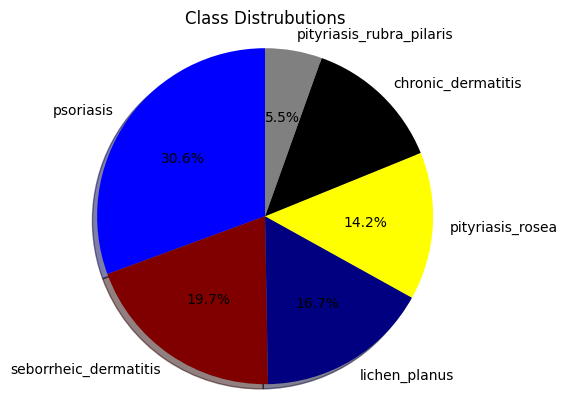

In [4]:
psoriasis, seborrheic_dermatitis,lichen_planus,pityriasis_rosea,chronic_dermatitis, pityriasis_rubra_pilaris= data["class"].value_counts().tolist()
labels = ["psoriasis", "seborrheic_dermatitis", "lichen_planus", "pityriasis_rosea", "chronic_dermatitis", "pityriasis_rubra_pilaris"]
values = [psoriasis, seborrheic_dermatitis,lichen_planus,pityriasis_rosea,chronic_dermatitis, pityriasis_rubra_pilaris]
colors=['blue','maroon','navy','yellow','black','gray']
fig1, ax1 = plt.subplots()
ax1.pie(values,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Class Distrubutions")
plt.show()

In [5]:
psoriasis, seborrheic_dermatitis,lichen_planus,pityriasis_rosea,chronic_dermatitis, pityriasis_rubra_pilaris=data["class"].value_counts().tolist()
labels = ["psoriasis", "seborrheic_dermatitis", "lichen_planus", "pityriasis_rosea", "chronic_dermatitis", "pityriasis_rubra_pilaris"]
class_distrubution = {}
class_distrubution["proriasis"] = psoriasis
class_distrubution["seborrheic_dermatitis"] = seborrheic_dermatitis
class_distrubution["lichen_planus"] = lichen_planus
class_distrubution["pityriasis_rosea"] = pityriasis_rosea
class_distrubution["chronic_dermatitis"] = chronic_dermatitis
class_distrubution["pityriasis_rubra_pilaris"] = pityriasis_rubra_pilaris

In [6]:
df_class_distrubution = pd.DataFrame.from_dict(class_distrubution, orient='index', columns= ["values"])
df_class_distrubution

,values
proriasis,112
seborrheic_dermatitis,72
lichen_planus,61
pityriasis_rosea,52
chronic_dermatitis,49
pityriasis_rubra_pilaris,20


In [7]:
data.shape

(366, 35)

In [8]:
data['age'].replace("?", np.nan, inplace=True)
si = SimpleImputer(missing_values=np.nan,strategy='mean')
si.fit(np.asarray(data['age'].astype(float)).reshape(-1, 1))
data['age'] = si.transform(np.asarray(data['age'].astype(float)).reshape(-1, 1))

In [9]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import time
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [11]:
models = [
    LogisticRegression(multi_class='multinomial'),
    KNeighborsClassifier(n_neighbors=10),
    DecisionTreeClassifier(criterion='entropy',max_depth=20),
    RandomForestClassifier(n_estimators=110, max_depth=20, criterion='entropy'),
    SVC(),
    MLPClassifier(),
]

models_description = [
    "Logistic Regression",
    "K-Nearest Neigbors",
    "Decision Tree Classifier",
    "Random Forest",
    "Support Vector Machines (SVM)",
    "Neural Network (Multi Layer Perceptron)",
]

In [12]:
def cd(ax,ay):
    tsne = TSNE(n_components=2, random_state=110, verbose=2)
    x_tsne = tsne.fit_transform(ax)

    plt.figure(figsize=(8, 8))
    sns.scatterplot(
        x=x_tsne[:,0], y=x_tsne[:,1],
        hue=ay, palette=sns.color_palette("hls", len(np.unique(ay))),
        alpha=0.8, edgecolor='none'
    )


    plt.title('t-SNE Plot for Dermatology Dataset')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title('t-SNE Visualization of Data with perplexity = 30')
    plt.legend(loc='upper right')
    plt.show()

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)
results = {}

In [14]:
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

# DEFAULT TRAIN AND EVALUATE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 292 samples in 0.000s...
[t-SNE] Computed neighbors for 292 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 292 / 292
[t-SNE] Mean sigma: 3.834885
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 49.8622322, gradient norm = 0.0407929 (50 iterations in 0.101s)
[t-SNE] Iteration 100: error = 49.2901649, gradient norm = 0.0290380 (50 iterations in 0.028s)
[t-SNE] Iteration 150: error = 49.2842636, gradient norm = 0.0418036 (50 iterations in 0.028s)
[t-SNE] Iteration 200: error = 49.2791786, gradient norm = 0.0317896 (50 iterations in 0.026s)
[t-SNE] Iteration 250: error = 49.3101311, gradient norm = 0.0566793 (50 iterations in 0.025s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.310131
[t-SNE] Iteration 300: error = 0.3149076, gradient norm = 0.0057801 (50 iterations in 0.024s)
[t-SNE] Iteration 350: error = 0.2956049, gradient norm = 0.0022801 (

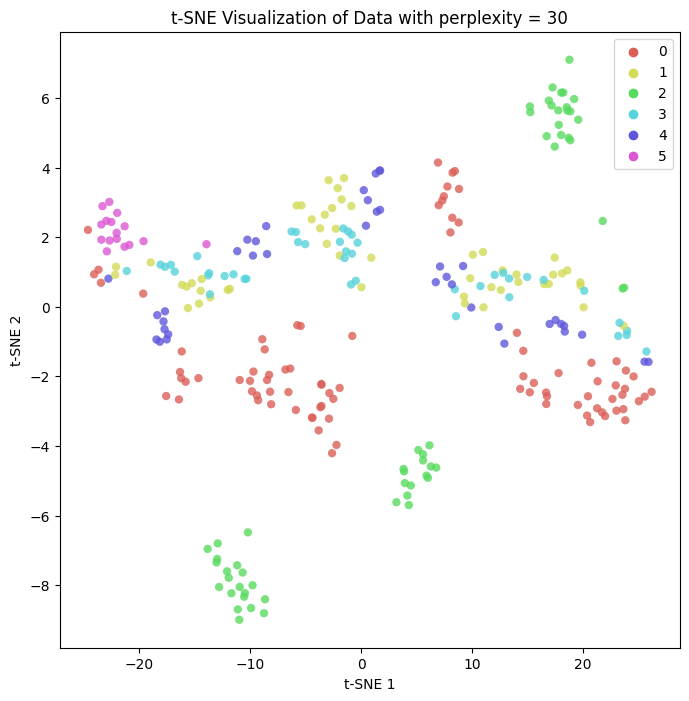

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=110)
cd(X_train, Y_train)

In [16]:
for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-

In [17]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.986486,0.988176,0.986486,0.986615,0.015086
Random Forest,0.986486,0.988176,0.986486,0.986615,0.100190
Neural Network (Multi Layer Perceptron),0.986486,0.988176,0.986486,0.986615,0.423159
Decision Tree Classifier,0.959459,0.964114,0.959459,0.959933,0.000911
K-Nearest Neigbors,0.837838,0.867663,0.837838,0.836781,0.002849
Support Vector Machines (SVM),0.729730,0.753306,0.729730,0.654923,0.004673


# SMOTE METHOD

In [18]:
results_SMOTE = {}

In [19]:
sm = SMOTE()
xs_train, ys_train = sm.fit_resample(X_train, Y_train)

In [20]:
xs_train.shape

(522, 34)

In [21]:
for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(xs_train, ys_train)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results_SMOTE[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
df_results = pd.DataFrame.from_dict(results_SMOTE, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.986486,0.988176,0.986486,0.986615,0.019260
Random Forest,0.986486,0.988176,0.986486,0.986615,0.117657
Decision Tree Classifier,0.972973,0.978979,0.972973,0.973311,0.002141
Neural Network (Multi Layer Perceptron),0.972973,0.978979,0.972973,0.973311,0.582810
Support Vector Machines (SVM),0.864865,0.882328,0.864865,0.859797,0.009210
K-Nearest Neigbors,0.837838,0.917556,0.837838,0.856659,0.023935


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 522 samples in 0.000s...
[t-SNE] Computed neighbors for 522 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 522 / 522
[t-SNE] Mean sigma: 2.846543
[t-SNE] Computed conditional probabilities in 0.010s
[t-SNE] Iteration 50: error = 53.8481789, gradient norm = 0.0320429 (50 iterations in 0.122s)
[t-SNE] Iteration 100: error = 51.5976295, gradient norm = 0.0118720 (50 iterations in 0.039s)
[t-SNE] Iteration 150: error = 51.2374878, gradient norm = 0.0013882 (50 iterations in 0.044s)
[t-SNE] Iteration 200: error = 51.1482735, gradient norm = 0.0007290 (50 iterations in 0.039s)
[t-SNE] Iteration 250: error = 51.1267776, gradient norm = 0.0010018 (50 iterations in 0.040s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.126778
[t-SNE] Iteration 300: error = 0.4093028, gradient norm = 0.0113228 (50 iterations in 0.040s)
[t-SNE] Iteration 350: error = 0.3113301, gradient norm = 0.0086175 (

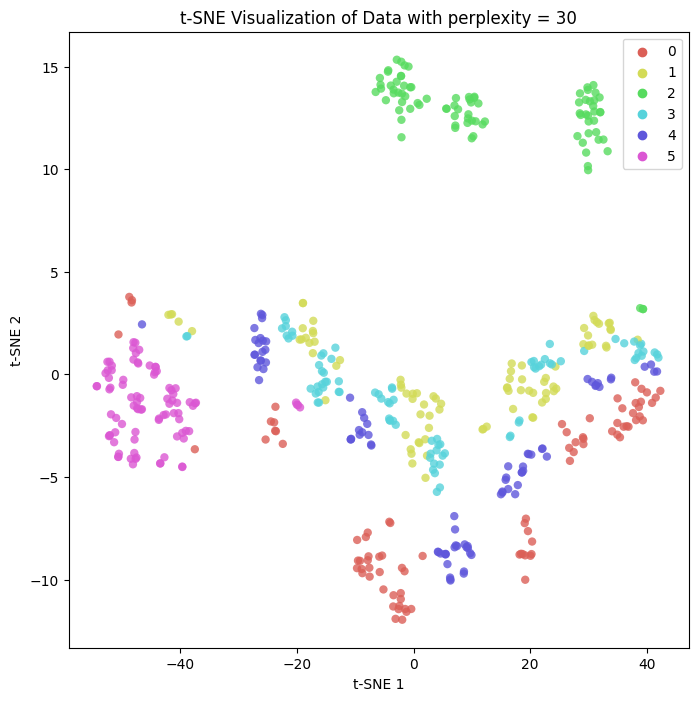

In [23]:
cd(xs_train, ys_train)

# SMOTE TOMEK

In [24]:
sm = SMOTETomek()
xsTOMEK_train, ysTOMEK_train = sm.fit_resample(X_train, Y_train)

In [25]:
results_SMOTETomek = {}

In [26]:
xsTOMEK_train.shape

(522, 34)

In [27]:
for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(xsTOMEK_train, ysTOMEK_train)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results_SMOTETomek[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
df_results = pd.DataFrame.from_dict(results_SMOTETomek, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.986486,0.988176,0.986486,0.986615,0.040763
Decision Tree Classifier,0.986486,0.988176,0.986486,0.986615,0.002115
Random Forest,0.986486,0.988176,0.986486,0.986615,0.119103
Neural Network (Multi Layer Perceptron),0.986486,0.988176,0.986486,0.986615,0.661385
Support Vector Machines (SVM),0.891892,0.905932,0.891892,0.891892,0.009321
K-Nearest Neigbors,0.851351,0.919643,0.851351,0.866262,0.017823


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 522 samples in 0.000s...
[t-SNE] Computed neighbors for 522 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 522 / 522
[t-SNE] Mean sigma: 2.805359
[t-SNE] Computed conditional probabilities in 0.010s
[t-SNE] Iteration 50: error = 53.7937050, gradient norm = 0.0233247 (50 iterations in 0.184s)
[t-SNE] Iteration 100: error = 51.7106972, gradient norm = 0.0040253 (50 iterations in 0.054s)
[t-SNE] Iteration 150: error = 51.3881607, gradient norm = 0.0012313 (50 iterations in 0.050s)
[t-SNE] Iteration 200: error = 51.3209839, gradient norm = 0.0017223 (50 iterations in 0.049s)
[t-SNE] Iteration 250: error = 51.2985191, gradient norm = 0.0006378 (50 iterations in 0.050s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.298519
[t-SNE] Iteration 300: error = 0.4218156, gradient norm = 0.0103442 (50 iterations in 0.056s)
[t-SNE] Iteration 350: error = 0.3288141, gradient norm = 0.0080439 (

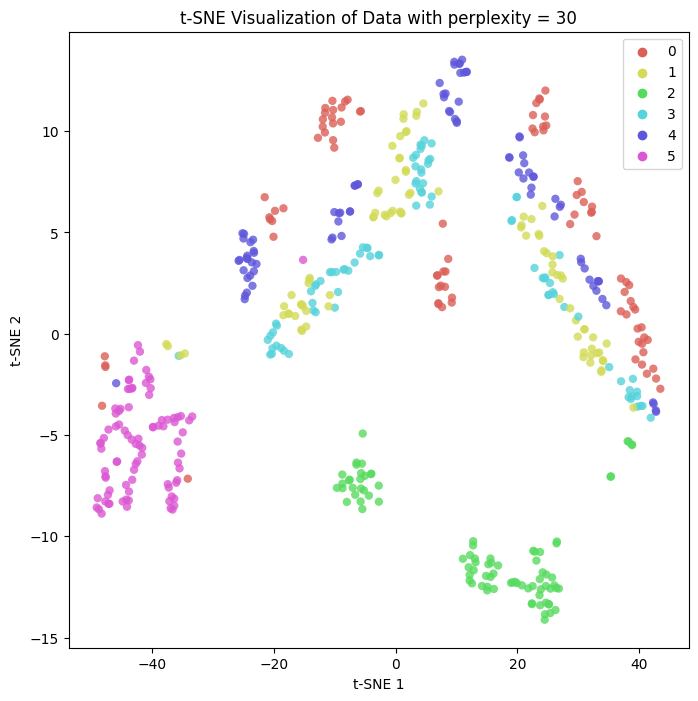

In [29]:
cd(xsTOMEK_train, ysTOMEK_train)

# SMOTE ENN

In [30]:
sm = SMOTEENN()
xsENN_train, ysENN_train = sm.fit_resample(X_train, Y_train)

In [31]:
xsENN_train.shape

(447, 34)

In [32]:
results_SMOTEENN = {}

In [33]:
for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(xsENN_train, ysENN_train)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results_SMOTEENN[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
df_results = pd.DataFrame.from_dict(results_SMOTEENN, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Neural Network (Multi Layer Perceptron),0.986486,0.988176,0.986486,0.986615,0.488870
Logistic Regression,0.972973,0.978979,0.972973,0.973311,0.018778
Random Forest,0.972973,0.978979,0.972973,0.973311,0.108539
Decision Tree Classifier,0.945946,0.960811,0.945946,0.944268,0.001740
Support Vector Machines (SVM),0.851351,0.872592,0.851351,0.833625,0.006416
K-Nearest Neigbors,0.783784,0.834084,0.783784,0.784639,0.051351


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 447 samples in 0.000s...
[t-SNE] Computed neighbors for 447 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 447 / 447
[t-SNE] Mean sigma: 2.983517
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 52.6057205, gradient norm = 0.0297971 (50 iterations in 0.155s)
[t-SNE] Iteration 100: error = 50.6617851, gradient norm = 0.0101497 (50 iterations in 0.049s)
[t-SNE] Iteration 150: error = 50.3520622, gradient norm = 0.0020196 (50 iterations in 0.036s)
[t-SNE] Iteration 200: error = 50.2631989, gradient norm = 0.0012338 (50 iterations in 0.037s)
[t-SNE] Iteration 250: error = 50.2256660, gradient norm = 0.0021190 (50 iterations in 0.039s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.225666
[t-SNE] Iteration 300: error = 0.3111200, gradient norm = 0.0097729 (50 iterations in 0.037s)
[t-SNE] Iteration 350: error = 0.2404068, gradient norm = 0.0069670 (

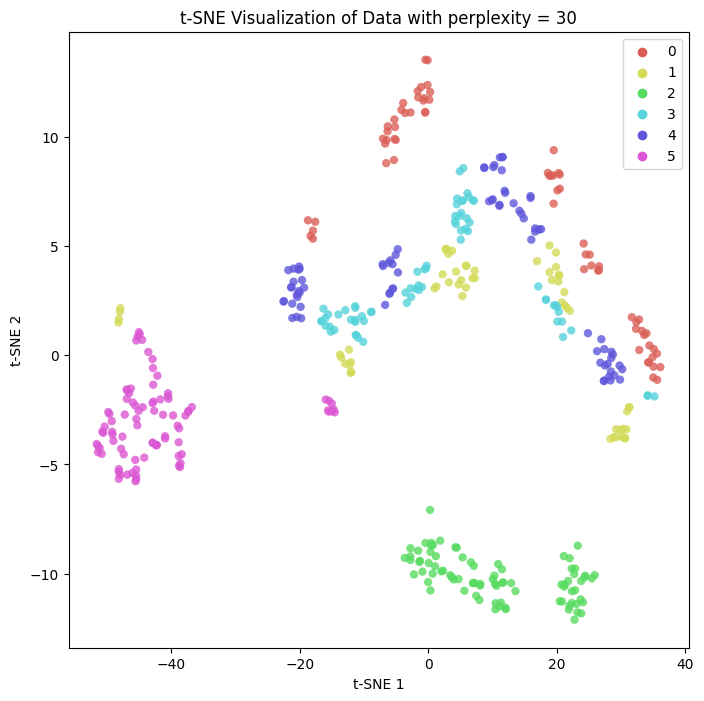

In [35]:
cd(xsENN_train, ysENN_train)

# ADASYN

In [36]:
ada = ADASYN()
xADA_train, yADA_train = ada.fit_resample(X_train, Y_train)

In [37]:
xADA_train.shape

(527, 34)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 527 samples in 0.000s...
[t-SNE] Computed neighbors for 527 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 527 / 527
[t-SNE] Mean sigma: 2.938079
[t-SNE] Computed conditional probabilities in 0.010s
[t-SNE] Iteration 50: error = 54.1959801, gradient norm = 0.0405761 (50 iterations in 0.119s)
[t-SNE] Iteration 100: error = 52.3035965, gradient norm = 0.0175926 (50 iterations in 0.049s)
[t-SNE] Iteration 150: error = 52.0596313, gradient norm = 0.0012873 (50 iterations in 0.048s)
[t-SNE] Iteration 200: error = 52.0301094, gradient norm = 0.0001898 (50 iterations in 0.044s)
[t-SNE] Iteration 250: error = 52.0221939, gradient norm = 0.0008215 (50 iterations in 0.060s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.022194
[t-SNE] Iteration 300: error = 0.4547288, gradient norm = 0.0109054 (50 iterations in 0.135s)
[t-SNE] Iteration 350: error = 0.3504266, gradient norm = 0.0076785 (

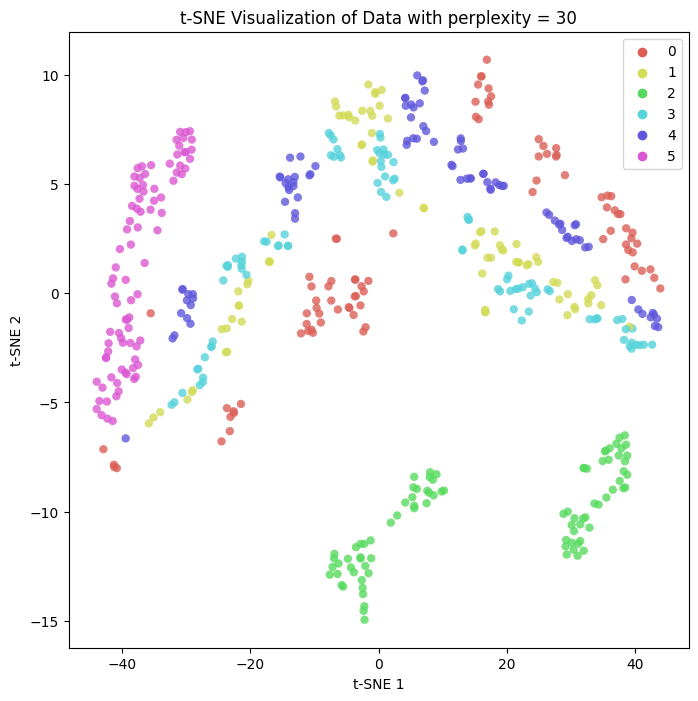

In [38]:
cd(xADA_train, yADA_train)

In [39]:
results_ADA = {}

In [40]:
for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(xADA_train, yADA_train)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results_ADA[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-

In [41]:
df_results = pd.DataFrame.from_dict(results_ADA, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,0.986486,0.988176,0.986486,0.986615,0.028894
Neural Network (Multi Layer Perceptron),0.986486,0.988176,0.986486,0.986615,0.481981
Decision Tree Classifier,0.972973,0.978979,0.972973,0.973311,0.002112
Random Forest,0.972973,0.978979,0.972973,0.973311,0.116723
K-Nearest Neigbors,0.918919,0.931006,0.918919,0.921367,0.002959
Support Vector Machines (SVM),0.851351,0.780124,0.851351,0.803525,0.010155
